In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 50)

In [ ]:
## Loading in the data, dropping null values
df = pd.read_csv('/content/drive/MyDrive/Datasets/hitting biomechanics/poi_metrics.csv')
df = df.dropna()

(677, 127)


## EDA

In [ ]:
df.shape

(642, 127)

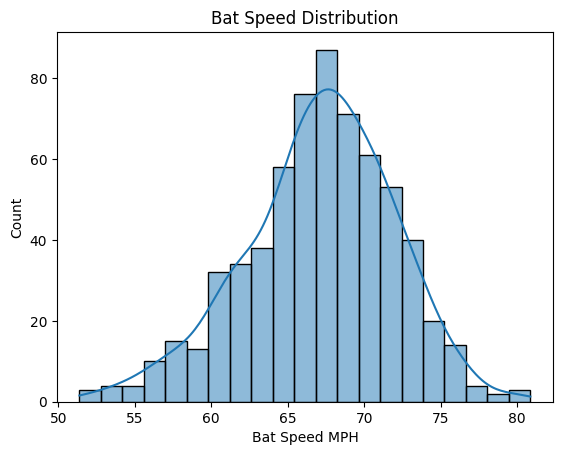

In [ ]:
# Bat speed distribution
sns.histplot(df['bat_speed_mph_max_x'], kde=True)
plt.title('Bat Speed Distribution')
plt.xlabel('Bat Speed MPH')
plt.show()

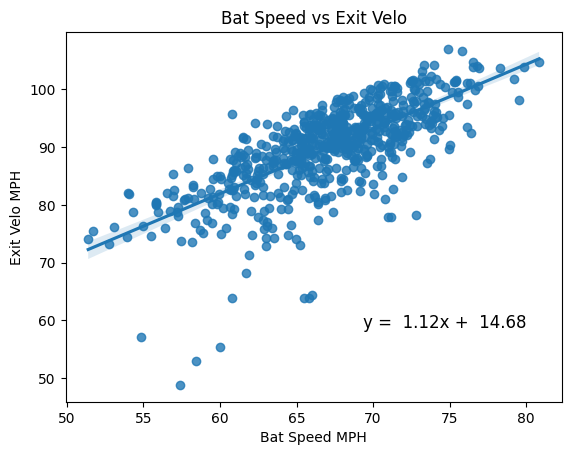

In [ ]:
## Linear relationship plot between bat speed and exit velo
regplot = sns.regplot(data=df, x='bat_speed_mph_max_x', y='exit_velo_mph_x')

slope, intercept = np.polyfit(df['bat_speed_mph_max_x'], df['exit_velo_mph_x'], 1)

## Generating line equation
equation = f'y = {slope: .2f}x + {intercept: .2f}'
regplot.annotate(equation, (0.6, 0.2), xycoords = 'axes fraction', fontsize=12, color='black')
plt.xlabel('Bat Speed MPH')
plt.ylabel('Exit Velo MPH')
plt.title('Bat Speed vs Exit Velo')

plt.show()

In [ ]:
## Examining the feautres that have the highest correlations with bat speed
correlations = df.corr(numeric_only=True)['bat_speed_mph_max_x']
correlations = abs(correlations)
correlations.sort_values(ascending=False).head(20)

bat_speed_mph_max_x                     1.000000
bat_speed_mph_contact_x                 0.980864
sweet_spot_velo_mph_contact_x           0.929713
blast_bat_speed_mph_x                   0.735395
bat_speed_xy_max_x                      0.733553
exit_velo_mph_x                         0.714731
hand_speed_blast_bat_mph_max_x          0.529927
hand_speed_mag_swing_max_velo_x         0.414451
hand_speed_mag_seq_max_x                0.402644
hand_speed_mag_max_x                    0.402644
pelvis_angular_velocity_fp_x            0.280969
pelvis_angular_velocity_stride_max_x    0.270273
upper_arm_speed_mag_seq_max_x           0.262812
upper_arm_speed_mag_swing_max_velo_x    0.262812
upper_arm_speed_mag_max_x               0.262812
pelvis_angular_velocity_maxhss_x        0.261097
torso_angular_velocity_swing_max_x      0.256902
torso_angular_velocity_seq_max_x        0.256902
torso_angular_velocity_maxhss_x         0.255108
sweet_spot_velo_mph_contact_y           0.249266
Name: bat_speed_mph_

In [ ]:
## Dropping irrelevant columns and features that have to do with bat speed, the thing we are trying to predict
cols = df.columns
cols = cols.drop(['session', 'exit_velo_mph_x', 'blast_bat_speed_mph_x', 'bat_speed_mph_contact_x', 'sweet_spot_velo_mph_contact_x', 'sweet_spot_velo_mph_contact_y',
                  'sweet_spot_velo_mph_contact_z', 'attack_angle_contact_x', 'bat_speed_xy_max_x', 'bat_max_x', 'bat_min_x',
                  'hand_speed_mag_max_x', 'hand_speed_blast_bat_mph_max_x', 'hand_speed_mag_swing_max_velo_x', 'hand_speed_mag_stride_max_velo_x', 'hand_speed_mag_seq_max_x',
                  'hand_speed_mag_maxhss_x', 'hand_speed_mag_fp_x', 'hand_speed_mag_fm_x'])
df = df[cols]

In [ ]:
# Checking highest correlations in general
high_corr = df.corr(numeric_only=True).unstack().sort_values(ascending=False)
high_corr.loc[:, high_corr != 1].head(20)

torso_launchpos_z                      torso_angle_fp_z                         1.000000
pelvis_fm_z                            pelvis_angle_fm_z                        1.000000
torso_angle_fp_z                       torso_launchpos_z                        1.000000
pelvis_angle_fm_z                      pelvis_fm_z                              1.000000
pelvis_angle_fp_z                      pelvis_launchpos_z                       1.000000
pelvis_launchpos_z                     pelvis_angle_fp_z                        1.000000
torso_angular_velocity_fp_x            torso_angular_velocity_stride_max_x      0.997920
torso_angular_velocity_stride_max_x    torso_angular_velocity_fp_x              0.997920
upper_arm_speed_mag_stride_max_velo_x  upper_arm_speed_mag_fp_x                 0.997470
upper_arm_speed_mag_fp_x               upper_arm_speed_mag_stride_max_velo_x    0.997470
pelvis_angular_velocity_maxhss_x       torso_angular_velocity_maxhss_x          0.990520
torso_angular_velocit

In [ ]:
## Removing features that have correlations greater than 0.75 with another so as to reduce redundant information, of these features keeping the one that has the highest correlation with bat speed

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set the threshold for correlation
threshold = 0.75

# Find correlations greater than the threshold
high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix.index != 'bat_speed_mph_max_x')

# Initialize a set to store columns to remove
columns_to_remove = set()

# Iterate through columns with high correlations
for col in high_correlations.columns:
    correlated_columns = high_correlations.index[high_correlations[col]]
    if correlated_columns.any():
        max_corr_column = correlation_matrix.loc[correlated_columns, 'bat_speed_mph_max_x'].abs().idxmax()
        columns_to_remove.update(correlated_columns.difference([max_corr_column]))

# Keep the 'bat_speed_mph_max_x' column
columns_to_remove.discard('bat_speed_mph_max_x')

# Keep the first column from each correlated group
columns_to_keep = set(df.columns) - columns_to_remove

# Create a new DataFrame with only the columns to keep
columns_to_keep = list(columns_to_keep)
df_1 = df[columns_to_keep]

## Initializing and testing models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

Random Forest
RMSE: 5.185897866363916
Slope of the line of best fit: 0.027054820647915753


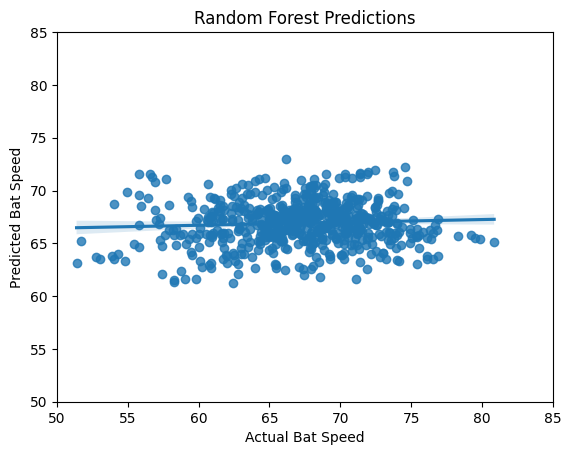

****************************************************************************************************
XGBoost
RMSE: 5.35853473253279
Slope of the line of best fit: 0.07652380868019533


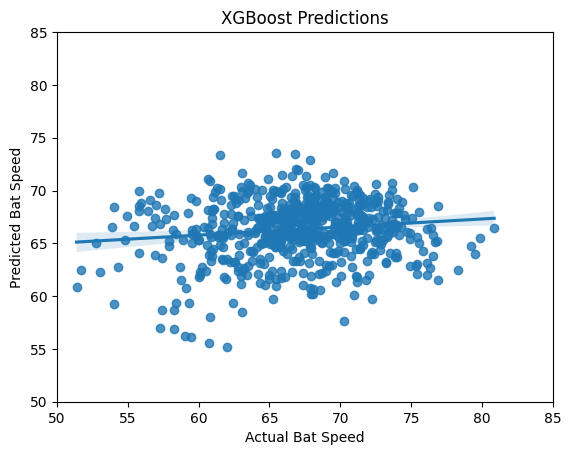

****************************************************************************************************


In [ ]:
## Initializing and testing various models
feats = df_1.columns.drop(['bat_speed_mph_max_x', 'session_swing'])
rf_name = [RandomForestRegressor(), 'Random Forest']
xgb_name = [XGBRegressor(), 'XGBoost']

for model, name in (rf_name, xgb_name):
    model = model

    # Generating predictions
    preds = cross_val_predict(model, df[feats], df['bat_speed_mph_max_x'], cv=5)

    # Generating RMSE
    print(name)
    print('RMSE: ' + str(mean_squared_error(preds, df['bat_speed_mph_max_x'])**0.5))

    # Generating slope of line of best fit
    slope, _ = np.polyfit(df['bat_speed_mph_max_x'], preds, deg=1)
    print("Slope of the line of best fit:", slope)

    # Plotting predictions against actual bat speed
    sns.regplot(x=df['bat_speed_mph_max_x'], y=preds)
    plt.ylabel('predicted_bat_speed')
    plt.title(name + ' Predictions')
    plt.ylabel('Predicted Bat Speed')
    plt.xlabel('Actual Bat Speed')
    plt.xlim([50, 85])
    plt.ylim([50, 85])
    plt.show()

    print('*'*100)

LinearRegression() RMSE: -5.709472565127995
Slope of the line of best fit: 0.09848558656203199


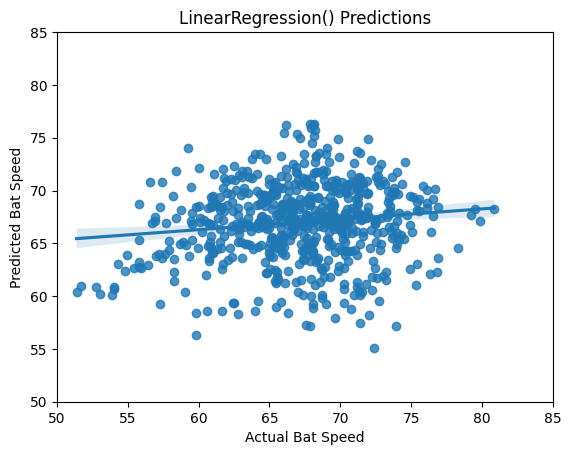

****************************************************************************************************
Ridge() RMSE: -5.6988846152392165
Slope of the line of best fit: 0.09439454382813305


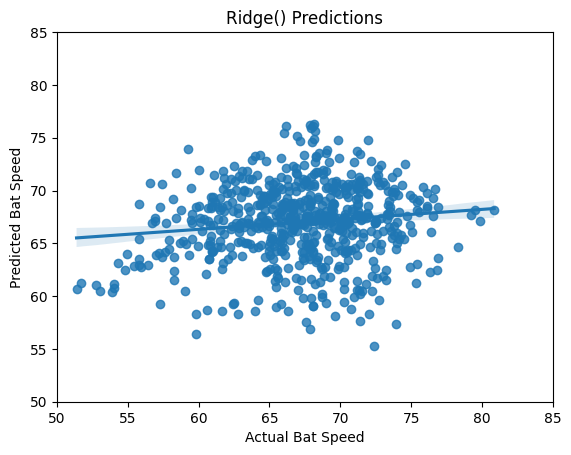

****************************************************************************************************
Lasso() RMSE: -4.941524071967503
Slope of the line of best fit: -0.01455774629087191


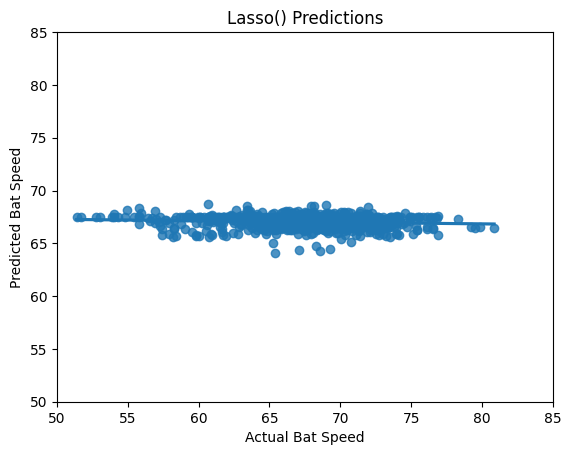

****************************************************************************************************


In [ ]:
## Testing how regressions do with scaled data
scaler = StandardScaler()
X = df[feats]
X_scaled = scaler.fit_transform(X)

models = [LinearRegression(), Ridge(), Lasso()]

for x in models:
    model = x
    print(str(model) + ' RMSE: ' + str(cross_val_score(model, X_scaled, df['bat_speed_mph_max_x'], cv=5, scoring='neg_root_mean_squared_error').mean()))

    # Generating predictions
    preds = cross_val_predict(x, X_scaled, df['bat_speed_mph_max_x'], cv=5)

    # Generating slope of line of best fit
    slope, _ = np.polyfit(df['bat_speed_mph_max_x'], preds, deg=1)
    print("Slope of the line of best fit:", slope)

    # Plotting predictions against actual bat speed
    sns.regplot(x=df['bat_speed_mph_max_x'], y=preds)
    plt.title(f'{x} Predictions')
    plt.ylabel('Predicted Bat Speed')
    plt.xlabel('Actual Bat Speed')
    plt.xlim([50, 85])
    plt.ylim([50, 85])
    plt.show()
    print('*'*100)

## Examining how removing features by correlations affects performance

In [ ]:
## Examining how the RMSE and line of best fit slope changes as the correlation threshold of what features to remove changes for Linear Regression
lr_thresholds = []
lr_rmse_scores = []
lr_slopes = []

for x in np.arange(0.25, 0.901, 0.0025):
    print('Iteration: ' + str(x))
    # Calculate the correlation matrix
    correlation_matrix = df.corr(numeric_only=True)

    # Set the threshold for correlation
    threshold = x
    lr_thresholds.append(x)

    # Find correlations greater than the threshold
    high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix.index != 'bat_speed_mph_max_x')

    # Initialize a set to store columns to remove
    columns_to_remove = set()

    # Iterate through columns with high correlations
    for col in high_correlations.columns:
        correlated_columns = high_correlations.index[high_correlations[col]]
        if correlated_columns.any():
            max_corr_column = correlation_matrix.loc[correlated_columns, 'bat_speed_mph_max_x'].abs().idxmax()
            columns_to_remove.update(correlated_columns.difference([max_corr_column]))

    # Keep the 'bat_speed_mph_max_x' column
    columns_to_remove.discard('bat_speed_mph_max_x')

    # Keep the first column from each correlated group
    columns_to_keep = set(df.columns) - columns_to_remove

    # Create a new DataFrame with only the columns to keep
    columns_to_keep = list(columns_to_keep)
    df_1 = df[columns_to_keep]
    feats = df_1.columns.drop(['bat_speed_mph_max_x', 'session_swing'])

    # Initializing model
    lr = LinearRegression()

    # Scaling the data
    scaler = StandardScaler()
    X = df[feats]
    X_scaled = scaler.fit_transform(X)

    # Generating predictions
    preds = cross_val_predict(lr, X_scaled, df['bat_speed_mph_max_x'], cv=5)

    # Generating and appending RMSE
    rmse = (mean_squared_error(preds, df['bat_speed_mph_max_x'])**0.5)
    lr_rmse_scores.append(rmse)

    # Generating and appending slopes
    slope, _ = np.polyfit(df['bat_speed_mph_max_x'], preds, deg=1)
    lr_slopes.append(slope)

Iteration: 0.25
Iteration: 0.2525
Iteration: 0.255
Iteration: 0.2575
Iteration: 0.26
Iteration: 0.2625
Iteration: 0.265
Iteration: 0.2675
Iteration: 0.27
Iteration: 0.2725
Iteration: 0.275
Iteration: 0.2775
Iteration: 0.28
Iteration: 0.28250000000000003
Iteration: 0.28500000000000003
Iteration: 0.28750000000000003
Iteration: 0.29000000000000004
Iteration: 0.29250000000000004
Iteration: 0.29500000000000004
Iteration: 0.29750000000000004
Iteration: 0.30000000000000004
Iteration: 0.30250000000000005
Iteration: 0.30500000000000005
Iteration: 0.30750000000000005
Iteration: 0.31000000000000005
Iteration: 0.31250000000000006
Iteration: 0.31500000000000006
Iteration: 0.31750000000000006
Iteration: 0.32000000000000006
Iteration: 0.32250000000000006
Iteration: 0.32500000000000007
Iteration: 0.32750000000000007
Iteration: 0.33000000000000007
Iteration: 0.3325000000000001
Iteration: 0.3350000000000001
Iteration: 0.3375000000000001
Iteration: 0.3400000000000001
Iteration: 0.3425000000000001
Iterati

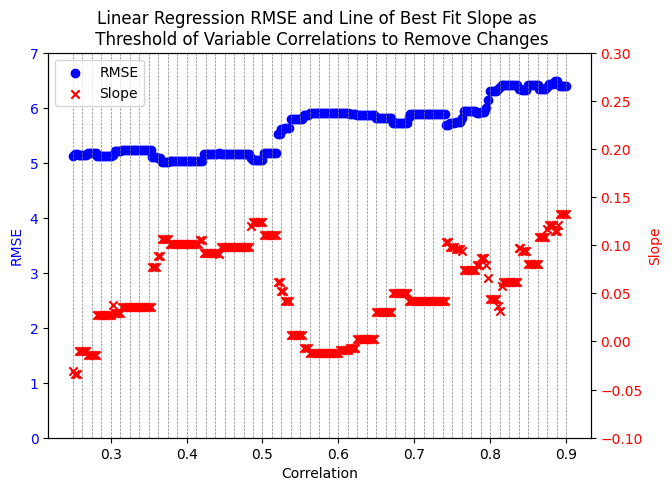

In [ ]:
## Plotting the RMSE and slope at the differing corrleations for Linear Regression
lr_abs_rmse = [abs(ele) for ele in lr_rmse_scores]

# Create the figure and left y-axis
fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.scatter(lr_thresholds, lr_abs_rmse, color='blue', marker='o', label='RMSE')
ax1.set_xlabel('Correlation')
ax1.set_ylabel('RMSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim([0, 7])

# Create the right y-axis
ax2 = ax1.twinx()
ax2.scatter(lr_thresholds, lr_slopes, color='red', marker='x', label='Slope')
ax2.set_ylabel('Slope', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([-0.1, 0.3])

# Add vertical grid lines
for x_value in range(0, len(lr_thresholds), 5):
    ax1.axvline(x=lr_thresholds[x_value], color='gray', linestyle='--', linewidth=0.5)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.title('Linear Regression RMSE and Line of Best Fit Slope as \n Threshold of Variable Correlations to Remove Changes')
# plt.grid(True, axis='both')
plt.show()

In [ ]:
7/8

0.875

In [ ]:
## Examining how the RMSE and line of best fit slope changes as the correlation threshold of what features to remove changes for Ridge Regression
ridge_thresholds = []
ridge_rmse_scores = []
ridge_slopes = []

for x in np.arange(0.25, 0.901, 0.0025):
    print('Iteration: ' + str(x))
    # Calculate the correlation matrix
    correlation_matrix = df.corr(numeric_only=True)

    # Set the threshold for correlation
    threshold = x
    ridge_thresholds.append(x)

    # Find correlations greater than the threshold
    high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix.index != 'bat_speed_mph_max_x')

    # Initialize a set to store columns to remove
    columns_to_remove = set()

    # Iterate through columns with high correlations
    for col in high_correlations.columns:
        correlated_columns = high_correlations.index[high_correlations[col]]
        if correlated_columns.any():
            max_corr_column = correlation_matrix.loc[correlated_columns, 'bat_speed_mph_max_x'].abs().idxmax()
            columns_to_remove.update(correlated_columns.difference([max_corr_column]))

    # Keep the 'bat_speed_mph_max_x' column
    columns_to_remove.discard('bat_speed_mph_max_x')

    # Keep the first column from each correlated group
    columns_to_keep = set(df.columns) - columns_to_remove

    # Create a new DataFrame with only the columns to keep
    columns_to_keep = list(columns_to_keep)
    df_1 = df[columns_to_keep]
    feats = df_1.columns.drop(['bat_speed_mph_max_x', 'session_swing'])

    # Initializing model
    ridge = Ridge()

    # Scaling the data
    scaler = StandardScaler()
    X = df[feats]
    X_scaled = scaler.fit_transform(X)

    # Generating predictions
    preds = cross_val_predict(ridge, X_scaled, df['bat_speed_mph_max_x'], cv=5)

    # Generating and appending RMSE
    rmse = (mean_squared_error(preds, df['bat_speed_mph_max_x'])**0.5)
    ridge_rmse_scores.append(rmse)

    # Generating and appending slopes
    slope, _ = np.polyfit(df['bat_speed_mph_max_x'], preds, deg=1)
    ridge_slopes.append(slope)

Iteration: 0.25
Iteration: 0.2525
Iteration: 0.255
Iteration: 0.2575
Iteration: 0.26
Iteration: 0.2625
Iteration: 0.265
Iteration: 0.2675
Iteration: 0.27
Iteration: 0.2725
Iteration: 0.275
Iteration: 0.2775
Iteration: 0.28
Iteration: 0.28250000000000003
Iteration: 0.28500000000000003
Iteration: 0.28750000000000003
Iteration: 0.29000000000000004
Iteration: 0.29250000000000004
Iteration: 0.29500000000000004
Iteration: 0.29750000000000004
Iteration: 0.30000000000000004
Iteration: 0.30250000000000005
Iteration: 0.30500000000000005
Iteration: 0.30750000000000005
Iteration: 0.31000000000000005
Iteration: 0.31250000000000006
Iteration: 0.31500000000000006
Iteration: 0.31750000000000006
Iteration: 0.32000000000000006
Iteration: 0.32250000000000006
Iteration: 0.32500000000000007
Iteration: 0.32750000000000007
Iteration: 0.33000000000000007
Iteration: 0.3325000000000001
Iteration: 0.3350000000000001
Iteration: 0.3375000000000001
Iteration: 0.3400000000000001
Iteration: 0.3425000000000001
Iterati

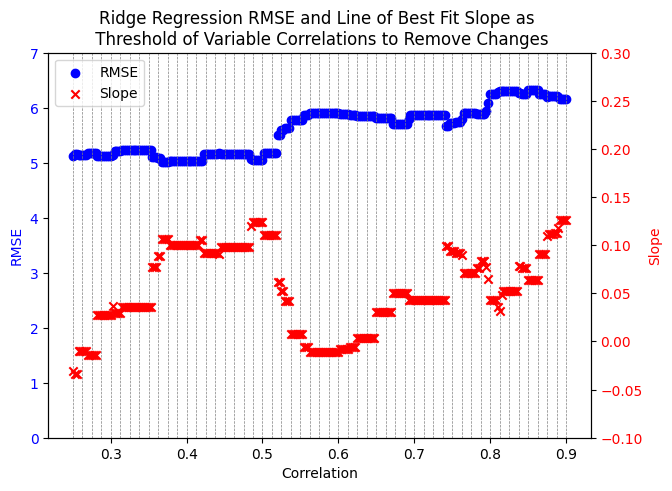

In [ ]:
## Plotting the RMSE and slope at the differing corrleations for Ridge Regression
ridge_abs_rmse = [abs(ele) for ele in ridge_rmse_scores]

# Create the figure and left y-axis
fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.scatter(ridge_thresholds, ridge_abs_rmse, color='blue', marker='o', label='RMSE')
ax1.set_xlabel('Correlation')
ax1.set_ylabel('RMSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim([0, 7])

# Create the right y-axis
ax2 = ax1.twinx()
ax2.scatter(ridge_thresholds, ridge_slopes, color='red', marker='x', label='Slope')
ax2.set_ylabel('Slope', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([-0.1, 0.3])

# Add vertical grid lines
for x_value in range(0, len(ridge_thresholds), 5):
    ax1.axvline(x=ridge_thresholds[x_value], color='gray', linestyle='--', linewidth=0.5)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.title('Ridge Regression RMSE and Line of Best Fit Slope as \n Threshold of Variable Correlations to Remove Changes')
plt.show()

In [ ]:
((6/8) + (7/8))/2

0.8125

In [ ]:
## Examining how the RMSE and line of best fit slope changes as the correlation threshold of what features to remove changes for XGBoost
xgb_thresholds = []
xgb_rmse_scores = []
xgb_slopes = []

for x in np.arange(0.25, 0.901, 0.005):
    print('Iteration: ' + str(x))
    # Calculate the correlation matrix
    correlation_matrix = df.corr(numeric_only=True)

    # Set the threshold for correlation
    threshold = x
    xgb_thresholds.append(x)

    # Find correlations greater than the threshold
    high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix.index != 'bat_speed_mph_max_x')

    # Initialize a set to store columns to remove
    columns_to_remove = set()

    # Iterate through columns with high correlations
    for col in high_correlations.columns:
        correlated_columns = high_correlations.index[high_correlations[col]]
        if correlated_columns.any():
            max_corr_column = correlation_matrix.loc[correlated_columns, 'bat_speed_mph_max_x'].abs().idxmax()
            columns_to_remove.update(correlated_columns.difference([max_corr_column]))

    # Keep the 'bat_speed_mph_max_x' column
    columns_to_remove.discard('bat_speed_mph_max_x')

    # Keep the first column from each correlated group
    columns_to_keep = set(df.columns) - columns_to_remove

    # Create a new DataFrame with only the columns to keep
    columns_to_keep = list(columns_to_keep)
    df_1 = df[columns_to_keep]
    feats = df_1.columns.drop(['bat_speed_mph_max_x', 'session_swing'])

    # Initializing model
    xgb = XGBRegressor()

    # Generating predictions
    preds = cross_val_predict(xgb, df[feats], df['bat_speed_mph_max_x'], cv=5)

    # Generating and appending RMSE
    rmse = (mean_squared_error(preds, df['bat_speed_mph_max_x'])**0.5)
    xgb_rmse_scores.append(rmse)

    # Generating and appending slopes
    slope, _ = np.polyfit(df['bat_speed_mph_max_x'], preds, deg=1)
    xgb_slopes.append(slope)

Iteration: 0.25
Iteration: 0.255
Iteration: 0.26
Iteration: 0.265
Iteration: 0.27
Iteration: 0.275
Iteration: 0.28
Iteration: 0.28500000000000003
Iteration: 0.29000000000000004
Iteration: 0.29500000000000004
Iteration: 0.30000000000000004
Iteration: 0.30500000000000005
Iteration: 0.31000000000000005
Iteration: 0.31500000000000006
Iteration: 0.32000000000000006
Iteration: 0.32500000000000007
Iteration: 0.33000000000000007
Iteration: 0.3350000000000001
Iteration: 0.3400000000000001
Iteration: 0.3450000000000001
Iteration: 0.3500000000000001
Iteration: 0.3550000000000001
Iteration: 0.3600000000000001
Iteration: 0.3650000000000001
Iteration: 0.3700000000000001
Iteration: 0.3750000000000001
Iteration: 0.3800000000000001
Iteration: 0.3850000000000001
Iteration: 0.3900000000000001
Iteration: 0.39500000000000013
Iteration: 0.40000000000000013
Iteration: 0.40500000000000014
Iteration: 0.41000000000000014
Iteration: 0.41500000000000015
Iteration: 0.42000000000000015
Iteration: 0.4250000000000001

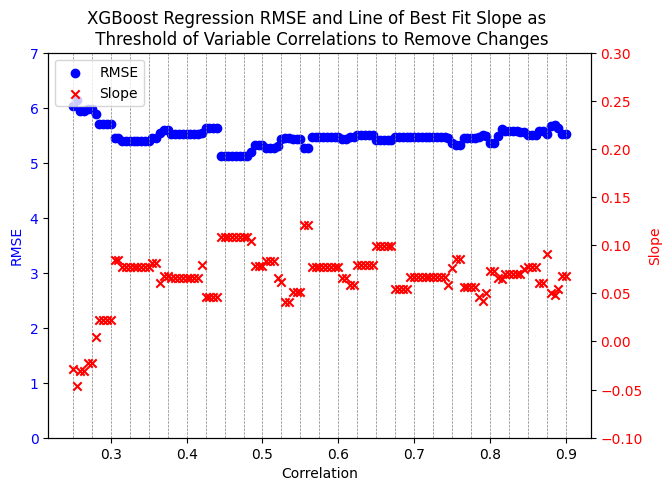

In [ ]:
## Plotting the RMSE and slope at the differing corrleations for XGBoost Regression
xgb_abs_rmse = [abs(ele) for ele in xgb_rmse_scores]

# Create the figure and left y-axis
fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.scatter(xgb_thresholds, xgb_abs_rmse, color='blue', marker='o', label='RMSE')
ax1.set_xlabel('Correlation')
ax1.set_ylabel('RMSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim([0, 7])

# Create the right y-axis
ax2 = ax1.twinx()
ax2.scatter(xgb_thresholds, xgb_slopes, color='red', marker='x', label='Slope')
ax2.set_ylabel('Slope', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([-0.1, 0.3])

# Add vertical grid lines
for x_value in range(0, len(xgb_thresholds), 5):
    ax1.axvline(x=xgb_thresholds[x_value], color='gray', linestyle='--', linewidth=0.5)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.title('XGBoost Regression RMSE and Line of Best Fit Slope as \n Threshold of Variable Correlations to Remove Changes')
plt.show()

In [ ]:
## Creating dataframes with the features that led to the best performances in the Ridge Regression and XGBoost Regression

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

## Ridge dataframe
# Set the threshold for correlation
threshold = 0.48125

# Find correlations greater than the threshold
high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix.index != 'bat_speed_mph_max_x')

# Initialize a set to store columns to remove
columns_to_remove = set()

# Iterate through columns with high correlations
for col in high_correlations.columns:
    correlated_columns = high_correlations.index[high_correlations[col]]
    if correlated_columns.any():
        max_corr_column = correlation_matrix.loc[correlated_columns, 'bat_speed_mph_max_x'].abs().idxmax()
        columns_to_remove.update(correlated_columns.difference([max_corr_column]))

# Keep the 'bat_speed_mph_max_x' column
columns_to_remove.discard('bat_speed_mph_max_x')

# Keep the first column from each correlated group
columns_to_keep = set(df.columns) - columns_to_remove

# Create a new DataFrame with only the columns to keep
columns_to_keep = list(columns_to_keep)
ridge_df = df[columns_to_keep]
ridge_feats = ridge_df.columns.drop(['bat_speed_mph_max_x', 'session_swing'])

## XGBoost dataframe
# Set the threshold for correlation
threshold = 0.45

# Find correlations greater than the threshold
high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix.index != 'bat_speed_mph_max_x')

# Initialize a set to store columns to remove
columns_to_remove = set()

# Iterate through columns with high correlations
for col in high_correlations.columns:
    correlated_columns = high_correlations.index[high_correlations[col]]
    if correlated_columns.any():
        max_corr_column = correlation_matrix.loc[correlated_columns, 'bat_speed_mph_max_x'].abs().idxmax()
        columns_to_remove.update(correlated_columns.difference([max_corr_column]))

# Keep the 'bat_speed_mph_max_x' column
columns_to_remove.discard('bat_speed_mph_max_x')

# Keep the first column from each correlated group
columns_to_keep = set(df.columns) - columns_to_remove

# Create a new DataFrame with only the columns to keep
columns_to_keep = list(columns_to_keep)
xgb_df = df[columns_to_keep]
xgb_feats = xgb_df.columns.drop(['bat_speed_mph_max_x', 'session_swing'])

In [ ]:
ridge_feats

Index(['torso_swing_max_y', 'lead_knee_stride_max_x', 'rear_shoulder_stride_max_z', 'rear_elbow_swing_max_x', 'bat_torso_angle_ds_x', 'torso_angle_fm_x', 'bat_torso_angle_ds_z', 'upper_arm_speed_mag_fm_x', 'x_factor_fp_z', 'rear_shoulder_stride_max_x', 'rear_hip_stride_max_z', 'lead_wrist_fm_x', 'torso_stride_max_z', 'max_cog_velo_x', 'rear_shoulder_stride_max_y', 'x_factor_fm_y', 'upper_arm_speed_mag_max_x', 'pelvis_angular_velocity_maxhss_x', 'pelvis_angular_velocity_fp_x', 'rear_elbow_fm_z'], dtype='object')

In [ ]:
xgb_feats

Index(['torso_swing_max_y', 'lead_knee_stride_max_x', 'rear_shoulder_stride_max_z', 'rear_elbow_swing_max_x', 'bat_torso_angle_ds_x', 'torso_angle_fm_x', 'bat_torso_angle_ds_z', 'upper_arm_speed_mag_fm_x', 'x_factor_fp_z', 'rear_shoulder_stride_max_x', 'rear_hip_stride_max_z', 'lead_wrist_fm_x', 'torso_stride_max_z', 'max_cog_velo_x', 'rear_shoulder_stride_max_y', 'x_factor_fm_y', 'upper_arm_speed_mag_max_x', 'pelvis_angular_velocity_maxhss_x', 'pelvis_angular_velocity_fp_x', 'rear_elbow_fm_z'], dtype='object')

## Learning curves

In [ ]:
from sklearn.model_selection import learning_curve

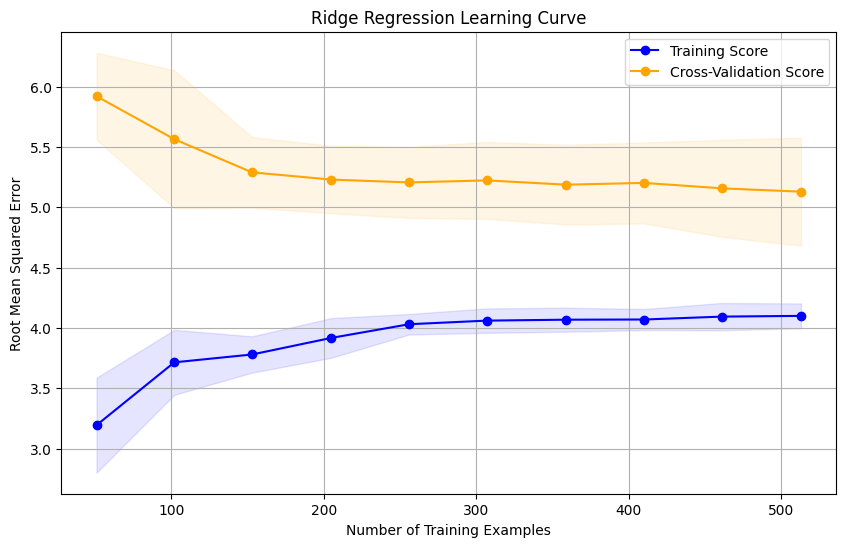

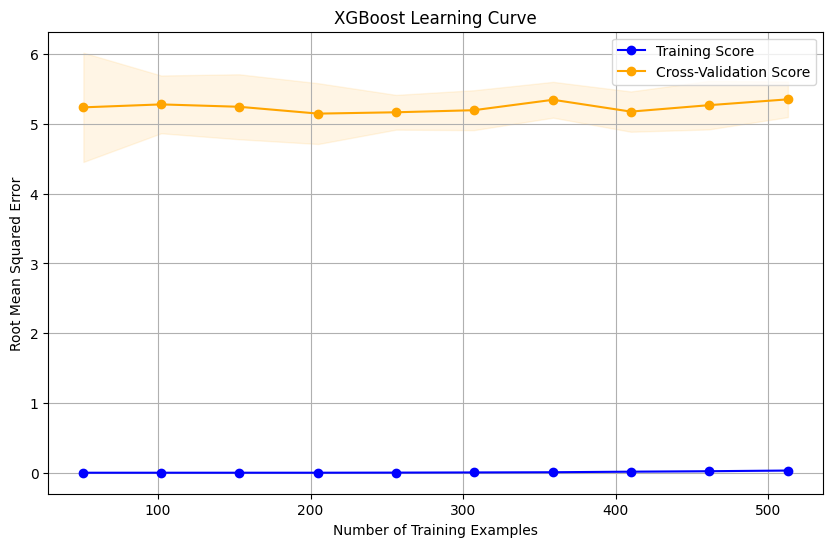

In [ ]:
for model, name, feats in ([Ridge(), 'Ridge Regression', ridge_feats], [XGBRegressor(), 'XGBoost', xgb_feats]):
    model = model

    # Define the range of training set sizes you want to use
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Generate the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, df[feats], df['bat_speed_mph_max_x'], train_sizes=train_sizes, cv=5, scoring='neg_root_mean_squared_error', shuffle=True
    )

    # Calculate mean and standard deviation of training and validation scores
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Create a learning curve plot
    plt.figure(figsize=(10, 6))
    plt.title(f"{name} Learning Curve")
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Root Mean Squared Error")
    plt.grid()

    # Plot the learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-Validation Score")

    # Customize the plot as needed
    plt.legend(loc="best")
    plt.show()

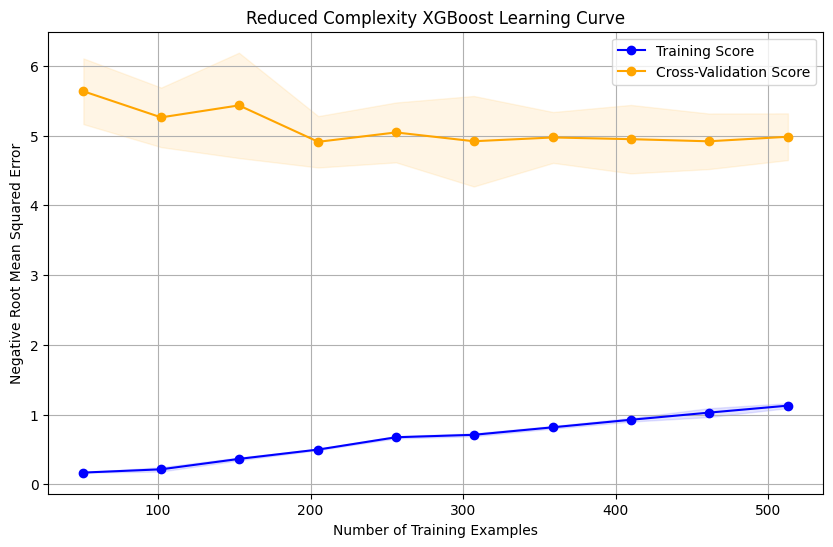

In [ ]:
model = XGBRegressor(max_depth=4,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    colsample_bylevel=0.8,
    reg_alpha=0.01,  # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    learning_rate=0.1  # Learning rate (eta)
    )

# Define the range of training set sizes you want to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, df[xgb_feats], df['bat_speed_mph_max_x'], train_sizes=train_sizes, cv=5, scoring='neg_root_mean_squared_error'
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Reduced Complexity XGBoost Learning Curve")
plt.xlabel("Number of Training Examples")
plt.ylabel("Negative Root Mean Squared Error")
plt.grid()

# Plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-Validation Score")

# Customize the plot as needed
plt.legend(loc="best")
plt.show()

## Hyperparameter tuning

In [ ]:
!pip install optuna

import optuna

In [ ]:
## Scaling the ridge dataframe
scaler = StandardScaler()
X = ridge_df[ridge_feats]
X_scaled = scaler.fit_transform(X)

In [ ]:
# Tuning Ridge Regression alpha using optuna
def objective(trial):
    # Define the hyperparameter to tune
    alpha = trial.suggest_loguniform('alpha', 500, 2500)

    # Create and evaluate the Ridge Regression model
    model = Ridge(alpha=alpha)
    score = cross_val_score(model, X_scaled, df['bat_speed_mph_max_x'], cv=5, scoring='neg_root_mean_squared_error').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2023-09-08 16:01:45,097] A new study created in memory with name: no-name-eb7501f2-c89d-4fc9-af66-c0138808a92e
<ipython-input-117-9d78a1cdef34>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 500, 2500)
[I 2023-09-08 16:01:45,121] Trial 0 finished with value: -4.749711963985755 and parameters: {'alpha': 1882.0889769554578}. Best is trial 0 with value: -4.749711963985755.
<ipython-input-117-9d78a1cdef34>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 500, 2500)
[I 2023-09-08 16:01:45,142] Trial 1 finished with value: -4.736615875277662 and parameters: {'alpha': 685.1742623661634}. B

Best Hyperparameters: {'alpha': 952.8373968434936}


Best is trial 56 with value: -4.731295910332894.
Best Hyperparameters: {'alpha': 951.8667895701567}

In [ ]:
# Tuning XGBoost model using optuna
def objective(trial):
    # Define the hyperparameter to tune
    params = {
    'objective':'reg:squarederror',
    'eval_metric': 'rmse',
    'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
    'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
    'alpha': trial.suggest_loguniform('alpha', 1e-5, 1),
    'max_depth': trial.suggest_int('max_depth', 3, 12),
    'eta': trial.suggest_loguniform('eta', 0.001, 1),
    'gamma': trial.suggest_loguniform('gamma', 1e-5, 1),
    'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-5, 1),
    'subsample': trial.suggest_uniform('subsample', 0.1, 1),
    'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1)}

    # Create and evaluate the XGBoost Regression model
    model = XGBRegressor(**params, random_state=42)
    score = cross_val_score(model, xgb_df[xgb_feats], df['bat_speed_mph_max_x'], cv=5, scoring='neg_root_mean_squared_error').mean()

    return score


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2023-09-08 16:01:51,776] A new study created in memory with name: no-name-a4d52f3f-edda-49d0-a483-cb0e3827142b
<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1),
<ipython-input-118-104790ac0ff7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 0.001, 1),

[16:02:12] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:12] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:13] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:13] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:13] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



[I 2023-09-08 16:02:13,452] Trial 4 finished with value: -5.392394013209152 and parameters: {'booster': 'gblinear', 'lambda': 0.07203738295897197, 'alpha': 0.12362410280585924, 'max_depth': 11, 'eta': 0.3199386710185842, 'gamma': 0.0055241616296058185, 'min_child_weight': 0.024901330487819336, 'subsample': 0.6158163990116725, 'colsample_bytree': 0.8487316750606798}. Best is trial 4 with value: -5.392394013209152.
<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 

[16:02:15] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:15] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:16] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:16] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:16] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



[I 2023-09-08 16:02:16,431] Trial 6 finished with value: -6.146624392858727 and parameters: {'booster': 'gblinear', 'lambda': 0.010014853923624216, 'alpha': 7.099625637787876e-05, 'max_depth': 12, 'eta': 0.014593745581375852, 'gamma': 0.006741846059277156, 'min_child_weight': 1.3891601698277811e-05, 'subsample': 0.34527460642616853, 'colsample_bytree': 0.2196979771446318}. Best is trial 4 with value: -5.392394013209152.
<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('a

[16:02:31] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:31] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:31] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:32] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:32] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



[I 2023-09-08 16:02:32,495] Trial 9 finished with value: -8.633185905465144 and parameters: {'booster': 'gblinear', 'lambda': 0.26956699676767715, 'alpha': 3.6295681135204267e-05, 'max_depth': 9, 'eta': 0.0014777372003709714, 'gamma': 0.01587973210271728, 'min_child_weight': 0.0017280909090752227, 'subsample': 0.4318463976822795, 'colsample_bytree': 0.5955741258514239}. Best is trial 8 with value: -5.045989871460093.
<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alph

[16:02:42] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:42] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:42] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:42] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:42] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1),
<ipython-input-118-104790ac0ff7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 0.001, 1),
<ipython-input-118-104790ac0ff7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

[16:02:56] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:56] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:57] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:57] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:02:57] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1),
<ipython-input-118-104790ac0ff7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 0.001, 1),
<ipython-input-118-104790ac0ff7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

[16:03:49] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:03:49] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:03:49] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:03:49] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:03:49] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1),
<ipython-input-118-104790ac0ff7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 0.001, 1),
<ipython-input-118-104790ac0ff7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

[16:04:09] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:04:09] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:04:09] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



[I 2023-09-08 16:04:10,504] Trial 55 finished with value: -5.608575098844112 and parameters: {'booster': 'gblinear', 'lambda': 0.07007566612388008, 'alpha': 0.0035161018323274125, 'max_depth': 10, 'eta': 0.06988581532123779, 'gamma': 9.40466451024274e-05, 'min_child_weight': 0.19345963035767447, 'subsample': 0.20153089400562116, 'colsample_bytree': 0.9572800991333439}. Best is trial 12 with value: -4.738211065226411.


[16:04:10] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:04:10] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1),
<ipython-input-118-104790ac0ff7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 0.001, 1),
<ipython-input-118-104790ac0ff7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

[16:04:21] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:04:21] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:04:22] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:04:22] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:04:22] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1),
<ipython-input-118-104790ac0ff7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 0.001, 1),
<ipython-input-118-104790ac0ff7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

[16:05:07] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:05:07] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:05:07] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:05:07] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:05:07] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1),
<ipython-input-118-104790ac0ff7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 0.001, 1),
<ipython-input-118-104790ac0ff7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

[16:05:52] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:05:52] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:05:52] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:05:52] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[16:05:52] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.



<ipython-input-118-104790ac0ff7>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5,1),
<ipython-input-118-104790ac0ff7>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1),
<ipython-input-118-104790ac0ff7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 0.001, 1),
<ipython-input-118-104790ac0ff7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

Best Hyperparameters: {'booster': 'gbtree', 'lambda': 0.00044705029833285706, 'alpha': 0.007338179423655225, 'max_depth': 4, 'eta': 0.04980708978666446, 'gamma': 1.1168879141227311e-05, 'min_child_weight': 0.9591554605801463, 'subsample': 0.10785074961298428, 'colsample_bytree': 0.9411216323250902}


Best is trial 99 with value: -4.697522493603471.
Best Hyperparameters: {'booster': 'gbtree', 'lambda': 0.004286761991197219, 'alpha': 2.461211565378674e-05, 'max_depth': 11, 'eta': 0.08143697508843639, 'gamma': 0.12535220227537958, 'min_child_weight': 0.00020657997760769987, 'subsample': 0.42497823115072997, 'colsample_bytree': 0.8936751195548178}

## Predictions

In [ ]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

In [ ]:
## Generating out of sample predictions for Ridge and XGBoost regressions
kf = KFold(5, shuffle=True, random_state=1)
ridge_oos_preds = pd.Series(dtype=float)
xgb_oos_preds = pd.Series(dtype=float)
df = df.reset_index(drop=True)

for train_index, test_index in kf.split(df):
    train = df.loc[train_index]
    test = df.loc[test_index]

    # Scaling data for Ridge Regression
    scaler = StandardScaler()
    X_train = train[ridge_feats]
    X_test = test[ridge_feats]
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = scaler.transform(X_test)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Generating OOS Ridge Regression predictions
    ridge = Ridge(alpha= 951.8667895701567, random_state=42)
    ridge.fit(X_train_scaled[ridge_feats], train['bat_speed_mph_max_x'])
    test['ridge_predicted_bat_speed'] = ridge.predict(X_test_scaled[ridge_feats])
    ridge_oos_preds = pd.concat([ridge_oos_preds, test['ridge_predicted_bat_speed']])

    # Generating OOS XGBoost predictions
    xgb = XGBRegressor(booster='gbtree', reg_lambda=0.004286761991197219, alpha =2.461211565378674e-05, max_depth = 11, eta = 0.08143697508843639, gamma = 0.12535220227537958,
                       min_child_weight = 0.00020657997760769987, subsample = 0.42497823115072997, colsample_bytree = 0.8936751195548178,
                       random_state=42)
    xgb.fit(train[xgb_feats], train['bat_speed_mph_max_x'])
    test['xgb_predicted_bat_speed'] = xgb.predict(test[xgb_feats])
    xgb_oos_preds = pd.concat([xgb_oos_preds, test['xgb_predicted_bat_speed']])

df['ridge_predicted_bat_speed'] = ridge_oos_preds
df['xgb_predicted_bat_speed'] = xgb_oos_preds

In [ ]:
# Generating Ridge Regression predictions using cross val predict
scaler = StandardScaler()
ridge = Ridge(alpha= 951.8667895701567, random_state=42)
ridge_pipeline = make_pipeline(StandardScaler(), ridge)
ridge_preds = cross_val_predict(ridge_pipeline, df[ridge_feats], df['bat_speed_mph_max_x'], cv=5)
ridge_preds = pd.Series(ridge_preds, index = df.index)
df['cvp_ridge_predicted_bat_speed'] = ridge_preds

# Generating XGBoost predictions using cross val predict
xgb = XGBRegressor(booster='gbtree', reg_lambda=0.004286761991197219, alpha =2.461211565378674e-05, max_depth = 11, eta = 0.08143697508843639, gamma = 0.12535220227537958,
                    min_child_weight = 0.00020657997760769987, subsample = 0.42497823115072997, colsample_bytree = 0.8936751195548178,
                   random_state=42)
xgb_preds = cross_val_predict(xgb, df[xgb_feats], df['bat_speed_mph_max_x'], cv=5)
xgb_preds = pd.Series(xgb_preds, index = df.index)
df['cvp_xgb_predicted_bat_speed'] = xgb_preds

## Model Evaluation

In [ ]:
from scipy.stats import pearsonr

Ridge Regression OOS R-Squared: 0.199
Ridge Regression OOS R-Squared: 4.49
Slope of the regression line: 0.10627933166775037


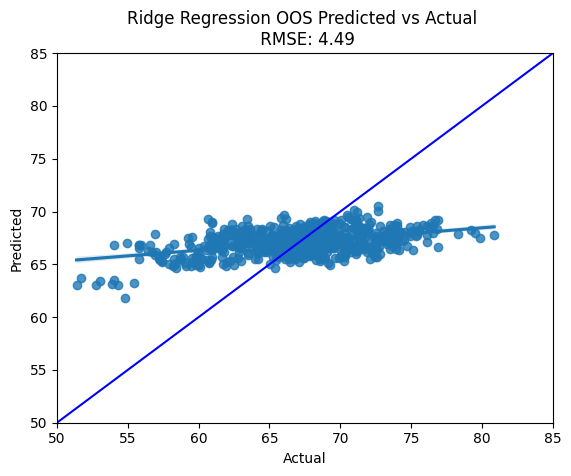

In [ ]:
## Evaluating the ridge regression predictions generated by manually going through 5 KFolds

# R-Squared and RMSE
r2 = pearsonr(df['bat_speed_mph_max_x'], df['ridge_predicted_bat_speed'])[0]**2
rmse = mean_squared_error(df['bat_speed_mph_max_x'], df['ridge_predicted_bat_speed'])**0.5

print('Ridge Regression OOS R-Squared: ' + str(round(r2, 3)))
print('Ridge Regression OOS R-Squared: ' + str(round(rmse, 2)))

# Generating slope
slope, _ = np.polyfit(df['bat_speed_mph_max_x'], df['ridge_predicted_bat_speed'], deg=1)
print("Slope of the regression line:", slope)

# Plotting predictions against actual
sns.regplot(x=df['bat_speed_mph_max_x'], y=df['ridge_predicted_bat_speed'])
plt.xlim([50,85])
plt.ylim([50, 85])

plt.plot([50,85], [50,85], color='blue')
plt.title(f'Ridge Regression OOS Predicted vs Actual \n RMSE: {round(rmse, 2)}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

XGBoost Regression OOS R-Squared: 0.68
XGBoost Regression OOS RMSE: 2.77
Slope of the regression line: 0.632726571997364


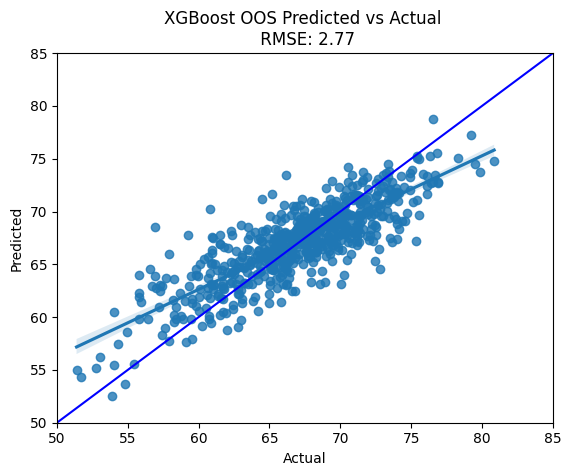

In [ ]:
## Evaluating the XGBoost regression predictions generated by manually going through 5 KFolds

# R-Squared and RMSE
r2 = pearsonr(df['bat_speed_mph_max_x'], df['xgb_predicted_bat_speed'])[0]**2
rmse = mean_squared_error(df['bat_speed_mph_max_x'], df['xgb_predicted_bat_speed'])**0.5

print('XGBoost Regression OOS R-Squared: ' + str(round(r2, 2)))
print('XGBoost Regression OOS RMSE: ' + str(round(rmse, 2)))

# Generating slope
slope, _ = np.polyfit(df['bat_speed_mph_max_x'], df['xgb_predicted_bat_speed'], deg=1)
print("Slope of the regression line:", slope)

# Plotting predictions against actual
sns.regplot(x=df['bat_speed_mph_max_x'], y=df['xgb_predicted_bat_speed'])
plt.xlim([50,85])
plt.ylim([50, 85])

plt.plot([50,85], [50,85], color='blue')
plt.title(f'XGBoost OOS Predicted vs Actual \n RMSE: {round(rmse,2)}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Ridge Regression cross val predict R-Squared: 0.05
Ridge Regression cross val predict RMSE: 4.76
Slope of the regression line: 0.05279277060445021


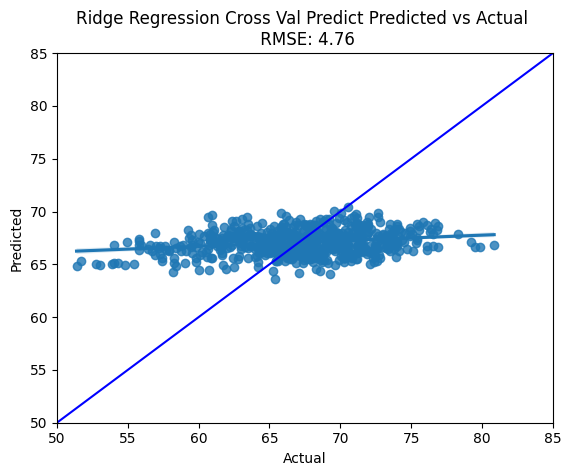

In [ ]:
## Evaluating the Ridge Regression predictions generated by cross val predict

# R-Squared and RMSE
r2 = pearsonr(df['bat_speed_mph_max_x'], df['cvp_ridge_predicted_bat_speed'])[0]**2
rmse = mean_squared_error(df['bat_speed_mph_max_x'], df['cvp_ridge_predicted_bat_speed'])**0.5

print('Ridge Regression cross val predict R-Squared: ' + str(round(r2, 2)))
print('Ridge Regression cross val predict RMSE: ' + str(round(rmse, 2)))

# Generating slope
slope, _ = np.polyfit(df['bat_speed_mph_max_x'], df['cvp_ridge_predicted_bat_speed'], deg=1)
print("Slope of the regression line:", slope)

# Plotting predictions against actual
sns.regplot(x=df['bat_speed_mph_max_x'], y=df['cvp_ridge_predicted_bat_speed'])
plt.xlim([50,85])
plt.ylim([50, 85])

plt.plot([50,85], [50,85], color='blue')
plt.title(f'Ridge Regression Cross Val Predict Predicted vs Actual \n RMSE: {round(rmse,2)}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

XGBoost cross val predict R-Squared: 0.05
XGBoost cross val predict RMSE: 4.88
Slope of the regression line: 0.10607763881822412


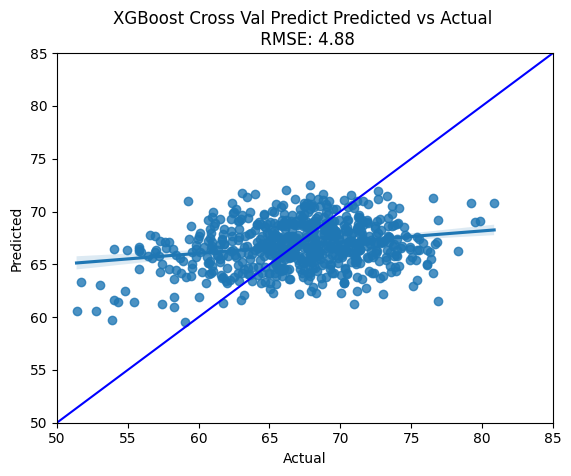

In [ ]:
## Evaluating the XGBoost regression predictions generated by cross val predict

# R-Squared and RMSE
r2 = pearsonr(df['bat_speed_mph_max_x'], df['cvp_xgb_predicted_bat_speed'])[0]**2
rmse = mean_squared_error(df['bat_speed_mph_max_x'], df['cvp_xgb_predicted_bat_speed'])**0.5

print('XGBoost cross val predict R-Squared: ' + str(round(r2, 2)))
print('XGBoost cross val predict RMSE: ' + str(round(rmse, 2)))

# Generating slope
slope, _ = np.polyfit(df['bat_speed_mph_max_x'], df['cvp_xgb_predicted_bat_speed'], deg=1)
print("Slope of the regression line:", slope)

# Plotting predictions against actual
sns.regplot(x=df['bat_speed_mph_max_x'], y=df['cvp_xgb_predicted_bat_speed'])
plt.xlim([50,85])
plt.ylim([50, 85])

plt.plot([50,85], [50,85], color='blue')
plt.title(f'XGBoost Cross Val Predict Predicted vs Actual \n RMSE: {round(rmse,2)}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

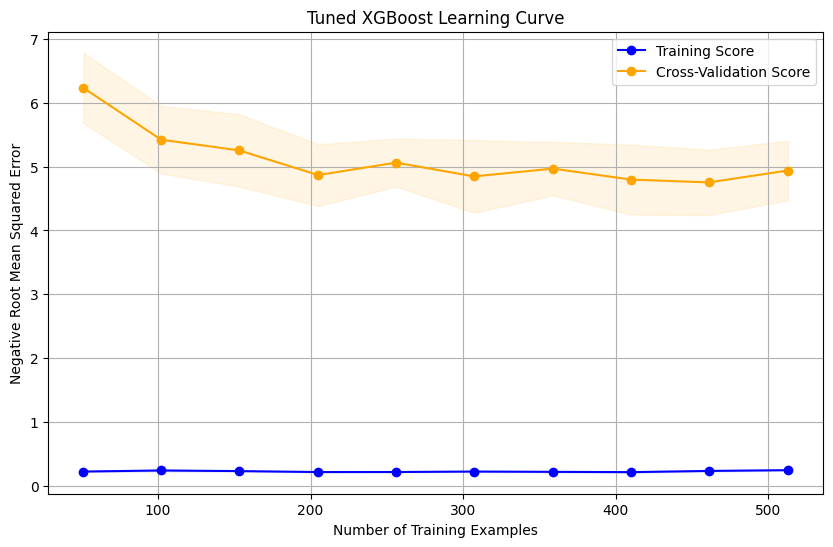

In [ ]:
## Tuned XGBoost Learning Curve

# Define the range of training set sizes you want to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    xgb, df[xgb_feats], df['bat_speed_mph_max_x'], train_sizes=train_sizes, cv=5, scoring='neg_root_mean_squared_error'
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Tuned XGBoost Learning Curve")
plt.xlabel("Number of Training Examples")
plt.ylabel("Negative Root Mean Squared Error")
plt.grid()

# Plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-Validation Score")

# Customize the plot as needed
plt.legend(loc="best")
plt.show()

## Feature Importance

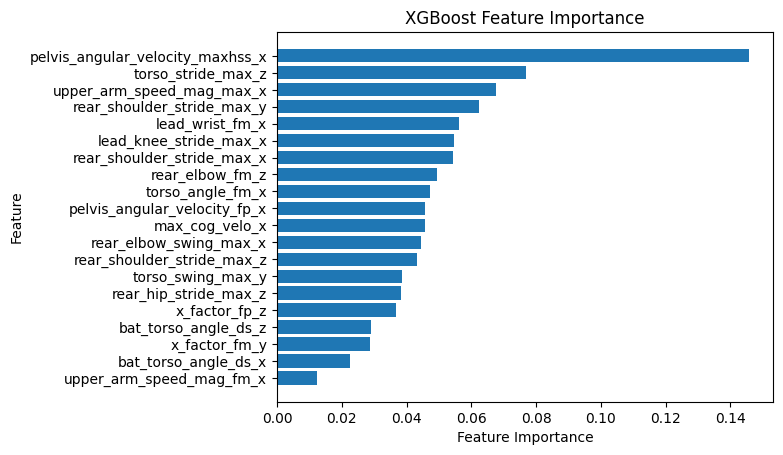

In [ ]:
# Fitting model to entire dataset
xgb.fit(df[xgb_feats], df['bat_speed_mph_max_x'])

# Getting feature importances
feature_importance = xgb.feature_importances_

# Feature Importance df
feature_importance_df = pd.DataFrame({'Feature': xgb_feats, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plotting the importances
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
def feature_plot(feature):
    # Getting pearson r
    r = pearsonr(df[feature], df['bat_speed_mph_max_x'])

    # Plot title
    title_str = f"""
    {feature}
    Pearson: {round(r[0], 3)} (p={round(r[1], 3)})
    """

    # Plotting the data
    regplot = sns.regplot(data=df, x=feature, y='bat_speed_mph_max_x')


    ## Generating line equation
    slope, intercept = np.polyfit(df[feature], df['bat_speed_mph_max_x'], 1)
    equation = f'y = {slope: .4f}x + {intercept: .2f}'
    regplot.annotate(equation, (0.1, 0.1), xycoords = 'axes fraction', fontsize=12, color='black')

    plt.title(title_str)
    plt.ylabel('Bat Speed MPH')
    plt.show

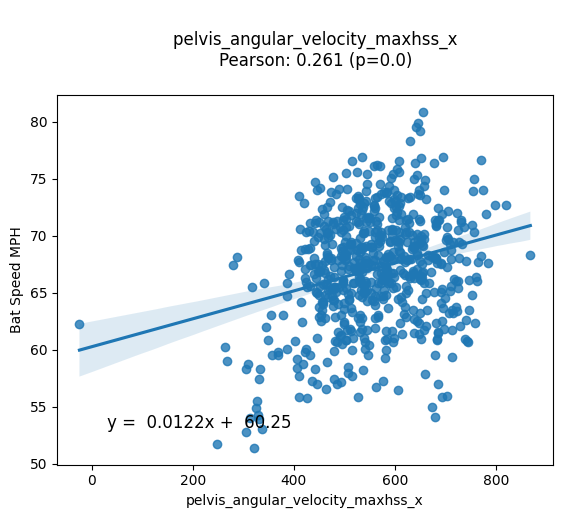

In [ ]:
feature_plot('pelvis_angular_velocity_maxhss_x')

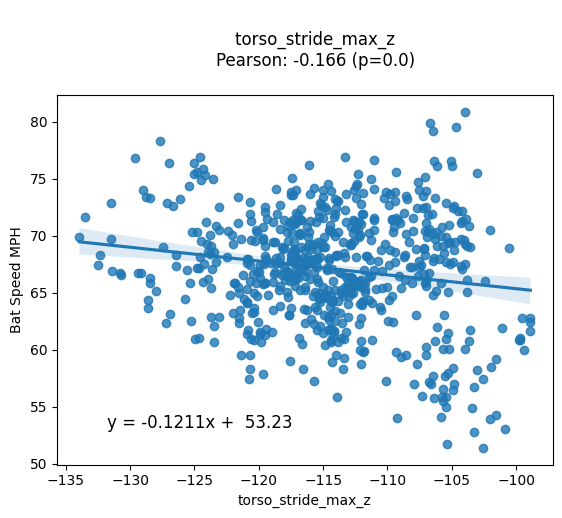

In [ ]:
feature_plot('torso_stride_max_z')

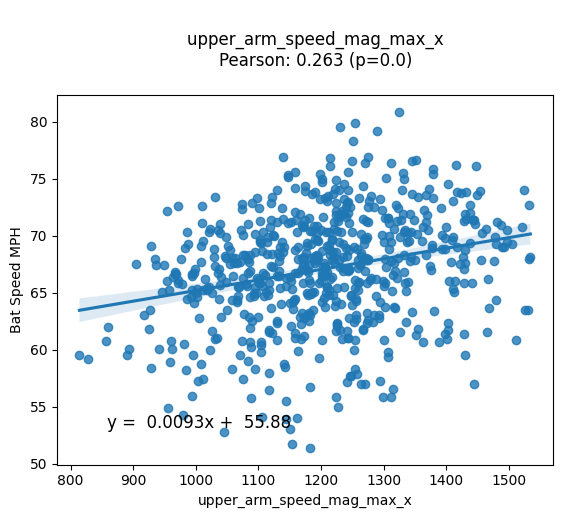

In [ ]:
feature_plot('upper_arm_speed_mag_max_x')